## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.graphics.tsaplots as tsa_plots
from pandas.plotting import lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose

## Importing Dataset

In [2]:
df = pd.read_excel(r"C:\Users\umair\OneDrive\Desktop\My Files\ExcelR\Assignments\Forecasting\CocaCola_Sales_Rawdata.xlsx")
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


## Data Analysis

In [3]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 804.0+ bytes


In [5]:
df.isna().sum()

Quarter    0
Sales      0
dtype: int64

In [6]:
df['Quarters']=0
df['Year']=0
for i in range(42):
    p=df["Quarter"][i]
    df['Quarters'][i]=p[0:2]
    df['Year'][i]=p[3:5]

C:\Users\umair\AppData\Local\Temp\ipykernel_7604\3277535930.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quarters'][i]=p[0:2]
C:\Users\umair\AppData\Local\Temp\ipykernel_7604\3277535930.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][i]=p[3:5]


In [7]:
df

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87
5,Q2_87,2104.411995,Q2,87
6,Q3_87,2014.362999,Q3,87
7,Q4_87,1991.746998,Q4,87
8,Q1_88,1869.049999,Q1,88
9,Q2_88,2313.631996,Q2,88


In [8]:
quarters_dummies = pd.DataFrame(pd.get_dummies(df['Quarters']))
df = pd.concat([df,quarters_dummies],axis=1)
df.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Quarter   42 non-null     object 
 1   Sales     42 non-null     float64
 2   Quarters  42 non-null     object 
 3   Year      42 non-null     object 
 4   Q1        42 non-null     uint8  
 5   Q2        42 non-null     uint8  
 6   Q3        42 non-null     uint8  
 7   Q4        42 non-null     uint8  
dtypes: float64(1), object(3), uint8(4)
memory usage: 1.6+ KB


## Data Visualizations

<Axes: xlabel='Quarters', ylabel='Year'>

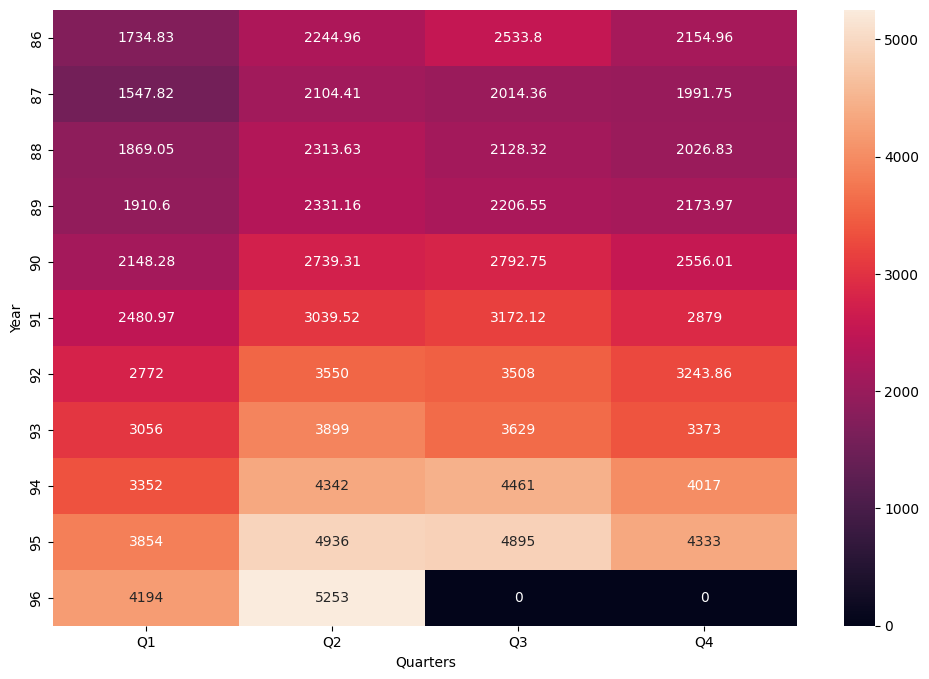

In [10]:
plt.figure(figsize=(12,8))
heatmap_y_year = pd.pivot_table(data=df,values="Sales",index="Year",columns="Quarters",fill_value=0)
sns.heatmap(heatmap_y_year,annot=True,fmt="g")

<Axes: >

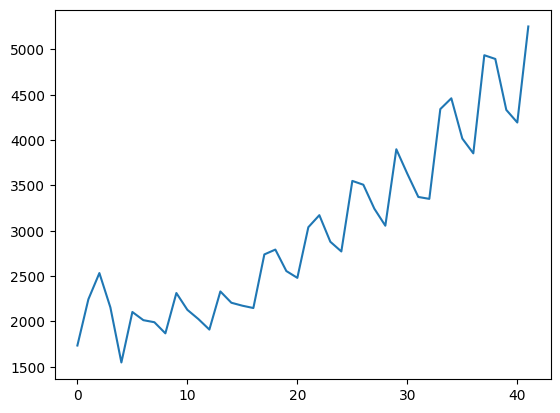

In [11]:
df.Sales.plot()

<Axes: >

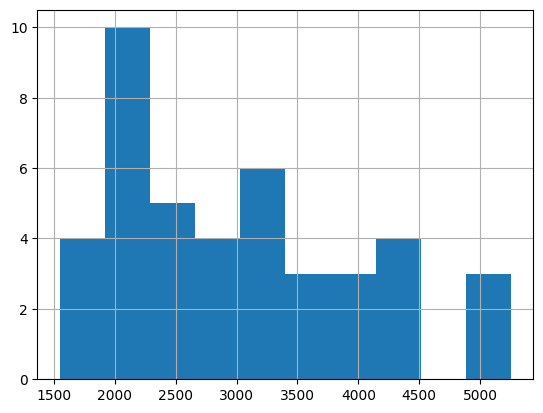

In [12]:
df.Sales.hist()


<Axes: ylabel='Density'>

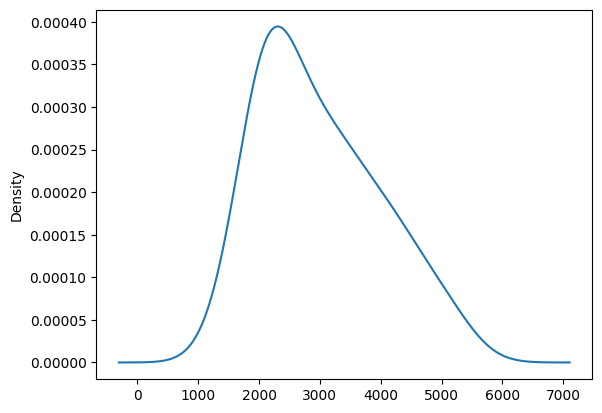

In [13]:
df.Sales.plot(kind='kde')


<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

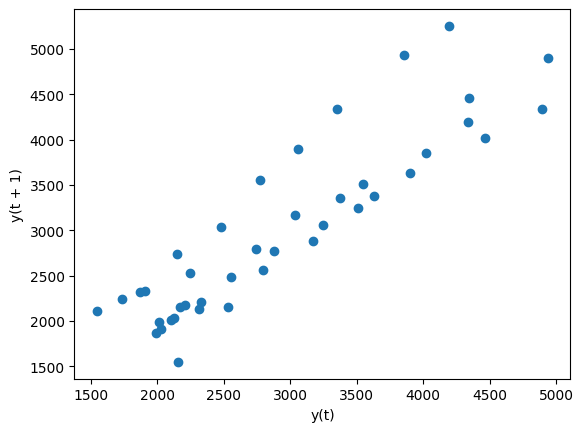

In [14]:
lag_plot(df.Sales)

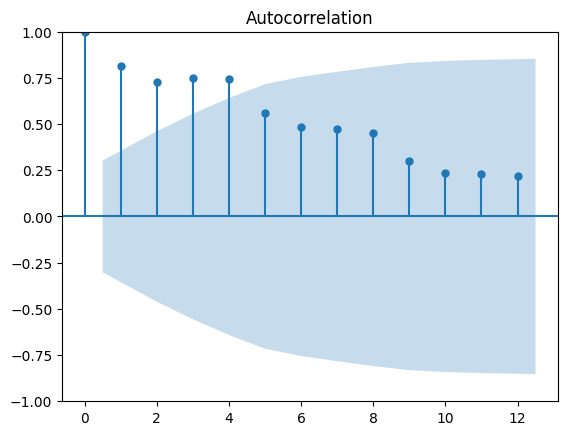

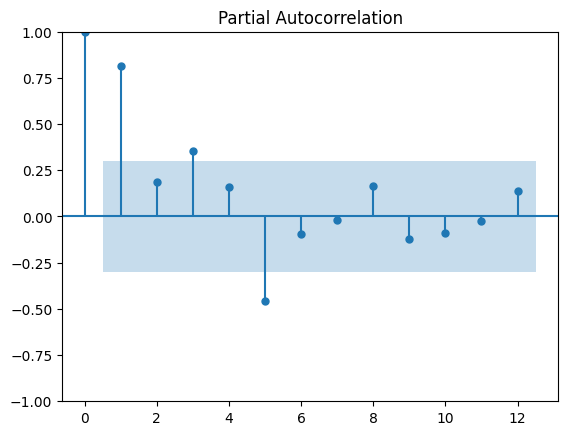

In [15]:
tsa_plots.plot_acf(df.Sales,lags=12);
tsa_plots.plot_pacf(df.Sales,lags=12);

<Axes: xlabel='Year', ylabel='Sales'>

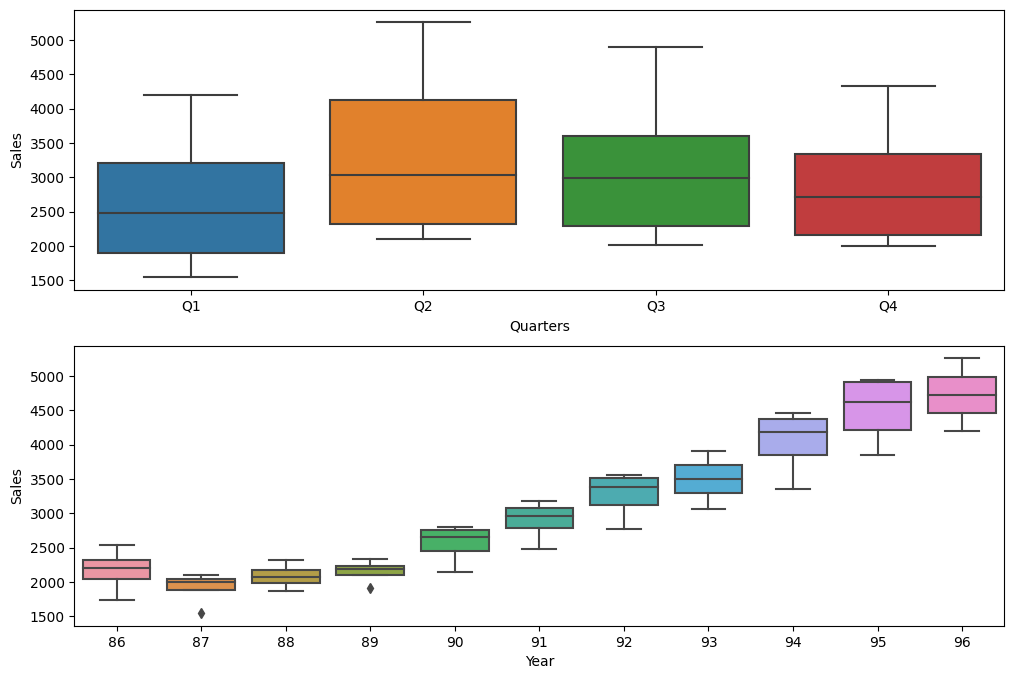

In [16]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.boxplot(x="Quarters",y="Sales",data=df)
plt.subplot(2,1,2)
sns.boxplot(x="Year",y="Sales",data=df)

In [17]:
df["t"] = np.arange(1,43)
df["t_squared"] = df["t"]*df["t"]
df["log_sales"] = np.log(df["Sales"])
df.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


<Axes: xlabel='Year', ylabel='Sales'>

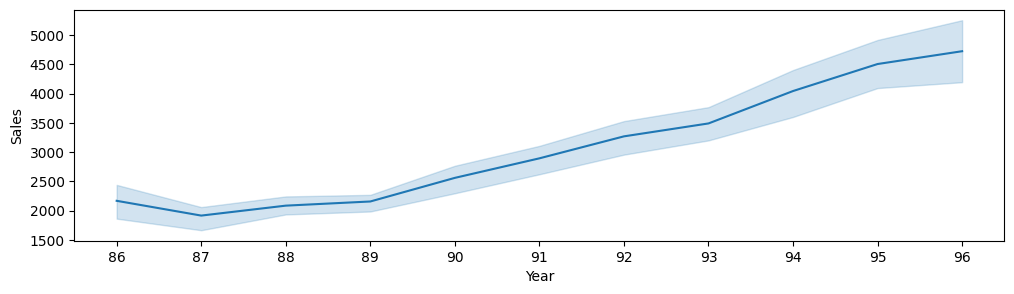

In [18]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Sales",data=df)

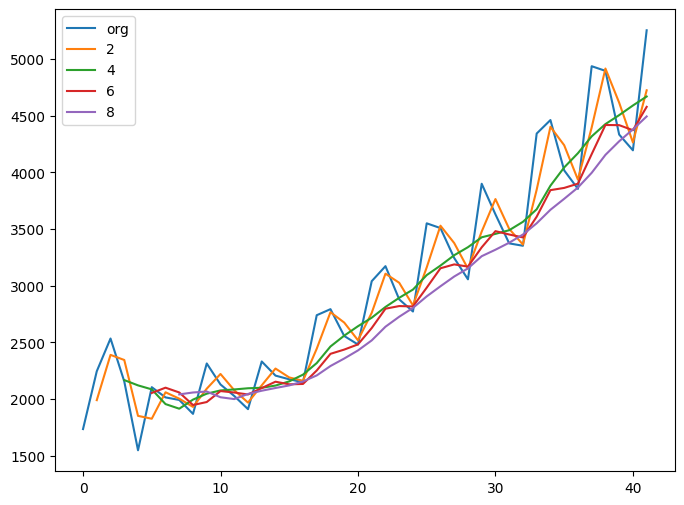

In [19]:
plt.figure(figsize=(8,6))
df.Sales.plot(label="org")
for i in range(2,10,2):
    df["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

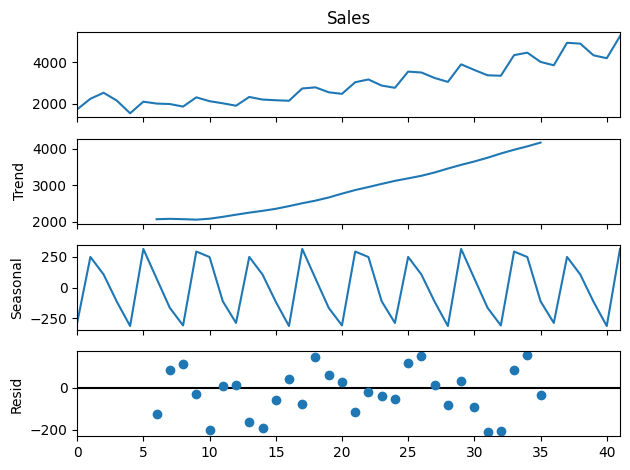

In [20]:
decompose_ts_add = seasonal_decompose(df.Sales,period=12)
decompose_ts_add.plot();

## Model Building

In [21]:
train = df.head(32)
test = df.tail(10)

In [22]:
linear_model = smf.ols('Sales~t', data=train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

752.9233932767132

In [23]:
Exp = smf.ols('log_sales~t', data=train).fit()
pred_exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

590.3316432076668

In [24]:
Quad = smf.ols('Sales~t+t_squared',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

457.7357355407403

In [25]:
add_sea = smf.ols('Sales~Q1+Q2+Q3',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Q1','Q2','Q3']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1850.466546185836

In [26]:
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Q1','Q2','Q3','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

277.35107711286804

In [27]:
Mul_sea = smf.ols('log_sales~Q1+Q2+Q3',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1908.2503948361164

In [28]:
Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

448.8678182691278

In [29]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,277.351077
6,rmse_Mult_add_sea,448.867818
2,rmse_quad,457.735736
1,rmse_exp,590.331643
0,rmse_linear,752.923393
3,rmse_add_sea,1850.466546
5,rmse_Mult_sea,1908.250395
